Descenso de gradiente naïve con dirección de descenso aleatoria

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def descenso_gradiente_naive_aleatorio(f, df, x0, alpha, maxIter, tol):
    x = x0
    iteraciones = [x0]
    valores_f = [f(x0)]
    errores = []
    
    for i in range(maxIter):
        direccion = np.random.randn(*x.shape)  # Dirección aleatoria
        direccion = direccion / np.linalg.norm(direccion)  # Normalizar la dirección
        x_new = x - alpha * direccion
        error = np.linalg.norm(x_new - x)
        
        iteraciones.append(x_new)
        valores_f.append(f(x_new))
        errores.append(error)
        
        if error < tol:
            return x_new, iteraciones, valores_f, errores, i + 1, True
        
        x = x_new
    
    return x, iteraciones, valores_f, errores, maxIter, False


Descenso máximo naïve

In [3]:
def descenso_maximo_naive(f, df, x0, alpha, maxIter, tol):
    x = x0
    iteraciones = [x0]
    valores_f = [f(x0)]
    errores = []
    
    for i in range(maxIter):
        grad = df(x)
        x_new = x - alpha * grad
        error = np.linalg.norm(x_new - x)
        
        iteraciones.append(x_new)
        valores_f.append(f(x_new))
        errores.append(error)
        
        if error < tol:
            return x_new, iteraciones, valores_f, errores, i + 1, True
        
        x = x_new
    
    return x, iteraciones, valores_f, errores, maxIter, False


Descenso de Newton con Hessiano aproximado

In [4]:
def descenso_newton_aprox(f, df, ddf, x0, alpha, maxIter, tol):
    x = x0
    iteraciones = [x0]
    valores_f = [f(x0)]
    errores = []
    
    for i in range(maxIter):
        grad = df(x)
        hess_aprox = np.eye(len(x))  
        direccion = np.linalg.solve(hess_aprox, grad)
        x_new = x - alpha * direccion
        error = np.linalg.norm(x_new - x)
        
        iteraciones.append(x_new)
        valores_f.append(f(x_new))
        errores.append(error)
        
        if error < tol:
            return x_new, iteraciones, valores_f, errores, i + 1, True
        
        x = x_new
    
    return x, iteraciones, valores_f, errores, maxIter, False


Descenso de Newton con Hessiano exacto

In [5]:
def descenso_newton_hessiano(f, df, ddf, x0, alpha, maxIter, tol):
    x = x0
    iteraciones = [x0]
    valores_f = [f(x0)]
    errores = []
    
    for i in range(maxIter):
        grad = df(x)
        hess = ddf(x)  # Hessiano exacto
        direccion = np.linalg.solve(hess, grad)
        x_new = x - alpha * direccion
        error = np.linalg.norm(x_new - x)
        
        iteraciones.append(x_new)
        valores_f.append(f(x_new))
        errores.append(error)
        
        if error < tol:
            return x_new, iteraciones, valores_f, errores, i + 1, True
        
        x = x_new
    
    return x, iteraciones, valores_f, errores, maxIter, False


In [6]:
def f(x):
    return np.sum(x ** 2)

def df(x):
    return 2 * x

def ddf(x):
    return 2 * np.eye(len(x))

# Parámetros
x0 = np.array([10.0, -5.0])  # Punto inicial
alpha = 0.1  # Tamaño de paso
maxIter = 100  # Número máximo de iteraciones
tol = 1e-6  # Tolerancia

print("Descenso de gradiente naive con dirección aleatoria:")
resultado_aleatorio = descenso_gradiente_naive_aleatorio(f, df, x0, alpha, maxIter, tol)
print("Resultado final:", resultado_aleatorio)

print("\nDescenso máximo naive:")
resultado_maximo = descenso_maximo_naive(f, df, x0, alpha, maxIter, tol)
print("Resultado final:", resultado_maximo)

print("\nDescenso de Newton con Hessiano aproximado:")
resultado_newton_aprox = descenso_newton_aprox(f, df, ddf, x0, alpha, maxIter, tol)
print("Resultado final:", resultado_newton_aprox)

print("\nDescenso de Newton con Hessiano exacto:")
resultado_newton_hess = descenso_newton_hessiano(f, df, ddf, x0, alpha, maxIter, tol)
print("Resultado final:", resultado_newton_hess)


Descenso de gradiente naive con dirección aleatoria:
Resultado final: (array([ 9.21498342, -4.88941004]), [array([10., -5.]), array([ 9.9874343 , -4.90079263]), array([ 9.90472277, -4.84458939]), array([ 9.81513649, -4.88902247]), array([ 9.90303383, -4.84133538]), array([ 9.80320065, -4.84710915]), array([ 9.70953554, -4.88213553]), array([ 9.65112784, -4.8009657 ]), array([ 9.59994317, -4.71505802]), array([ 9.50763289, -4.67660267]), array([ 9.60736827, -4.6693326 ]), array([ 9.5892041 , -4.57099613]), array([ 9.50401745, -4.62337202]), array([ 9.56834237, -4.54680633]), array([ 9.55124226, -4.44827925]), array([ 9.45528299, -4.47641851]), array([ 9.35956095, -4.5053545 ]), array([ 9.45231578, -4.54272481]), array([ 9.387592  , -4.61895362]), array([ 9.30362507, -4.67326343]), array([ 9.33044442, -4.76959993]), array([ 9.2881657 , -4.86022283]), array([ 9.21089798, -4.79674291]), array([ 9.26692479, -4.71391177]), array([ 9.23774898, -4.61826256]), array([ 9.22480574, -4.51910374]),

### Función 1

$f(x, y) = x^4 + y^4 - 4xy + \frac{1}{2}y + 1$

In [7]:
def f1(x):
    return x[0]**4 + x[1]**4 - 4*x[0]*x[1] + 0.5*x[1] + 1

def df1(x):
    dfdx1 = 4*x[0]**3 - 4*x[1]
    dfdx2 = 4*x[1]**3 - 4*x[0] + 0.5
    return np.array([dfdx1, dfdx2])

def ddf1(x):
    d2fdx1 = 12*x[0]**2
    d2fdx1dx2 = -4
    d2fdx2 = 12*x[1]**2 - 4
    return np.array([[d2fdx1, d2fdx1dx2], [d2fdx1dx2, d2fdx2]])



Método: Descenso Gradiente Naive Aleatorio f1
Iteración	Aproximación x_k	Error		Norma del Gradiente
1		[-3.  1.]	0.001000	113.208878
2		[-2.99918145  1.00057444]	0.001000	113.124245
3		[-2.99937065  0.9995925 ]	0.001000	113.138956
98		[-2.98614048  0.99177124]	0.001000	111.679969
99		[-2.98709836  0.99148406]	0.001000	111.780324
100		[-2.98683313  0.99244825]	0.001000	111.757558

Método: Descenso Máximo Naive f1
Iteración	Aproximación x_k	Error		Norma del Gradiente
1		[-3.  1.]	0.113209	113.208878
2		[-2.888   0.9835]	0.101530	101.529926
3		[-2.78771604  0.96764275]	0.091808	91.807609
98		[-0.97177442  0.2703383 ]	0.006521	6.521418
99		[-0.9670223   0.26587218]	0.006454	6.453775
100		[-0.96234164  0.26142891]	0.006388	6.387613

Método: Descenso Newton Aprox. f1
Iteración	Aproximación x_k	Error		Norma del Gradiente
1		[-3.  1.]	0.113209	113.208878
2		[-2.888   0.9835]	0.101530	101.529926
3		[-2.78771604  0.96764275]	0.091808	91.807609
98		[-0.97177442  0.2703383 ]	0.006521	6.521418
99	

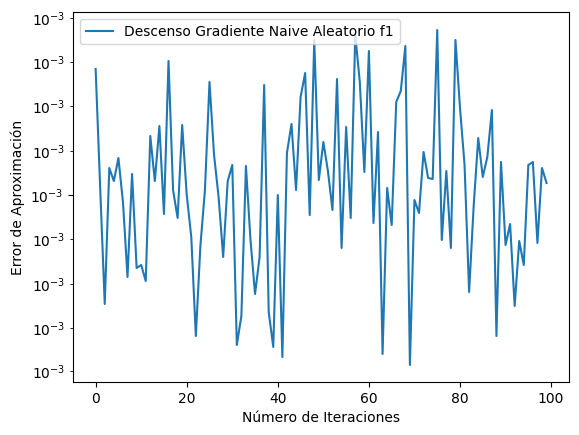

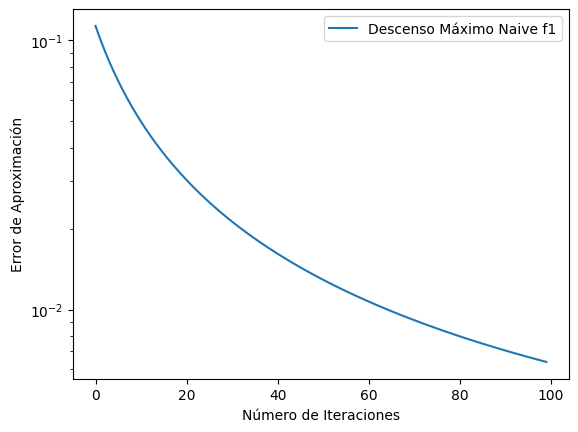

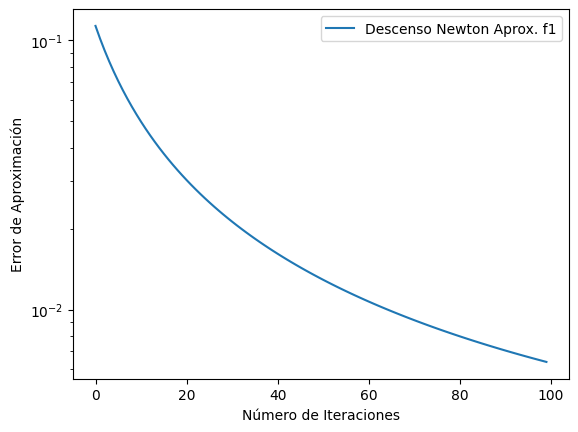

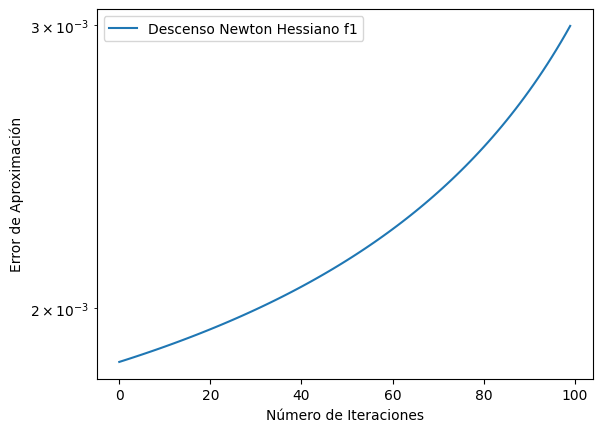

In [24]:
# Función para imprimir tabla con verificación de longitud
def imprimir_tabla(resultados, metodo):
    x_aprox, iteraciones, valores_f, errores, num_iter, convergencia = resultados
    num_iteraciones = min(len(iteraciones), len(errores))
    
    print(f"\nMétodo: {metodo}")
    print("Iteración\tAproximación x_k\tError\t\tNorma del Gradiente")
    
    # Imprimir primeras 3 iteraciones, asegurándonos que no exceda el tamaño de las listas
    for i in range(min(3, num_iteraciones)):  
        print(f"{i+1}\t\t{iteraciones[i]}\t{errores[i]:.6f}\t{np.linalg.norm(df1(iteraciones[i])):.6f}")
    
    # Imprimir últimas 3 iteraciones
    for i in range(max(0, num_iteraciones - 3), num_iteraciones):
        print(f"{i+1}\t\t{iteraciones[i]}\t{errores[i]:.6f}\t{np.linalg.norm(df1(iteraciones[i])):.6f}")
        
# Función para graficar
def graficar_errores(resultados, nombre):
    errores = resultados[3]
    plt.plot(errores, label=nombre)
    plt.yscale('log')  # Escala logarítmica para visualizar mejor la convergencia
    plt.xlabel("Número de Iteraciones")
    plt.ylabel("Error de Aproximación")
    plt.legend()

# Parámetros ajustados
x0 = np.array([-3.0, 1.0])
alpha = 0.001  # Tamaño de paso reducido
maxIter = 100  # Número máximo de iteraciones
tol = 1e-6  # Tolerancia

# Ejecutar los algoritmos con el nuevo valor de alpha
f1_gradiente = descenso_gradiente_naive_aleatorio(f1, df1, x0, alpha, maxIter, tol)
f1_maximo = descenso_maximo_naive(f1, df1, x0, alpha, maxIter, tol)
f1_aprox = descenso_newton_aprox(f1, df1, ddf1, x0, alpha, maxIter, tol)
f1_hessiano = descenso_newton_hessiano(f1, df1, ddf1, x0, alpha, maxIter, tol)
imprimir_tabla(f1_gradiente, "Descenso Gradiente Naive Aleatorio f1")
imprimir_tabla(f1_maximo, "Descenso Máximo Naive f1")
imprimir_tabla(f1_aprox, "Descenso Newton Aprox. f1")
imprimir_tabla(f1_hessiano, "Descenso Newton Hessiano f1")

# Graficar errores
graficar_errores(f1_gradiente, "Descenso Gradiente Naive Aleatorio f1")
plt.show()
graficar_errores(f1_maximo, "Descenso Máximo Naive f1")
plt.show()
graficar_errores(f1_aprox, "Descenso Newton Aprox. f1")
plt.show()
graficar_errores(f1_hessiano, "Descenso Newton Hessiano f1")
plt.show()


### Función 2

$f(x_1, x_2) = 100(x_2 - x_1^2)^2 + (1 - x_1)^2$

In [9]:
def f_rosenbrock_2d(x):
    return 100*(x[1] - x[0]**2)**2 + (1 - x[0])**2

def df_rosenbrock_2d(x):
    dfdx1 = -400*x[0]*(x[1] - x[0]**2) - 2*(1 - x[0])
    dfdx2 = 200*(x[1] - x[0]**2)
    return np.array([dfdx1, dfdx2])

def ddf_rosenbrock_2d(x):
    d2fdx1 = -400*(x[1] - x[0]**2) + 800*x[0]**2 + 2
    d2fdx1dx2 = -400*x[0]
    d2fdx2 = 200
    return np.array([[d2fdx1, d2fdx1dx2], [d2fdx1dx2, d2fdx2]])



Método: Descenso Gradiente Naive Aleatorio f2
Iteración	Aproximación x_k	Error		Norma del Gradiente
1		[-1.2  1. ]	0.000100	14.337425
2		[-1.20002222  1.0000975 ]	0.000100	14.338830
3		[-1.19992307  1.00011058]	0.000100	14.337411
98		[-1.19972927  0.99926095]	0.000100	14.325164
99		[-1.19969698  0.9993556 ]	0.000100	14.325680
100		[-1.19965467  0.99926499]	0.000100	14.324034

Método: Descenso Máximo Naive f2
Iteración	Aproximación x_k	Error		Norma del Gradiente
1		[-1.2  1. ]	0.023287	14.337425
2		[-1.17844  1.0088 ]	0.019856	14.100769
3		[-1.16009576  1.01639842]	0.017043	13.912378
98		[-1.02534197  1.059297  ]	0.000178	12.673613
99		[-1.02526382  1.05913758]	0.000178	12.670702
100		[-1.02518569  1.05897815]	0.000178	12.667793

Método: Descenso Newton Aprox. f2
Iteración	Aproximación x_k	Error		Norma del Gradiente
1		[-1.2  1. ]	0.023287	14.337425
2		[-1.17844  1.0088 ]	0.019856	14.100769
3		[-1.16009576  1.01639842]	0.017043	13.912378
98		[-1.02534197  1.059297  ]	0.000178	12.673613

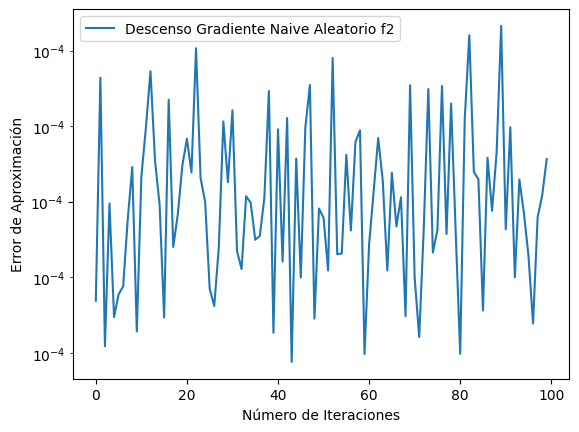

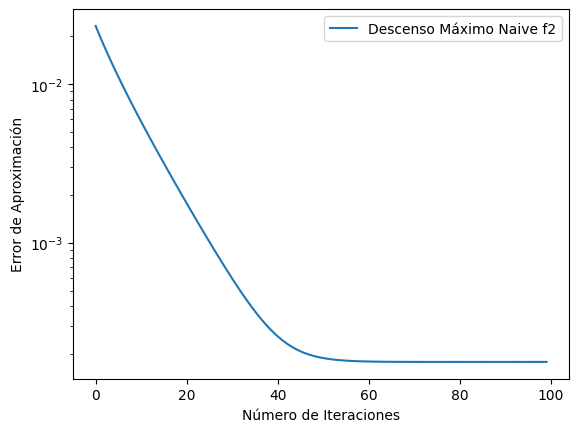

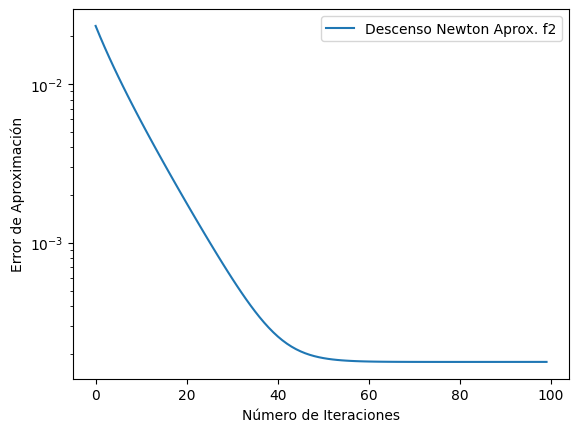

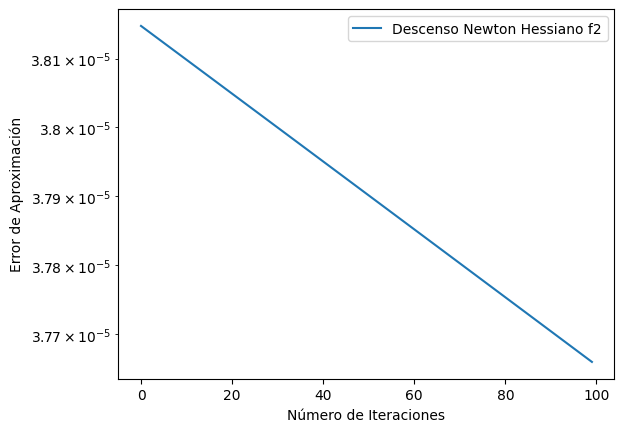

In [15]:
# Parámetros ajustados
x0 = np.array([-1.2, 1.0])
alpha = 0.0001  # Tamaño de paso reducido
maxIter = 100  # Número máximo de iteraciones
tol = 1e-6  # Tolerancia

# Ejecutar los algoritmos con el nuevo valor de alpha
f2_gradiente = descenso_gradiente_naive_aleatorio(f_rosenbrock_2d, df_rosenbrock_2d, x0, alpha, maxIter, tol)
f2_maximo = descenso_maximo_naive(f_rosenbrock_2d, df_rosenbrock_2d, x0, alpha, maxIter, tol)
f2_aprox = descenso_newton_aprox(f_rosenbrock_2d, df_rosenbrock_2d, ddf_rosenbrock_2d, x0, alpha, maxIter, tol)
f2_hessiano = descenso_newton_hessiano(f_rosenbrock_2d, df_rosenbrock_2d, ddf_rosenbrock_2d, x0, alpha, maxIter, tol)
imprimir_tabla(f2_gradiente, "Descenso Gradiente Naive Aleatorio f2")
imprimir_tabla(f2_maximo, "Descenso Máximo Naive f2")
imprimir_tabla(f2_aprox, "Descenso Newton Aprox. f2")
imprimir_tabla(f2_hessiano, "Descenso Newton Hessiano f2")

# Graficar errores
graficar_errores(f2_gradiente, "Descenso Gradiente Naive Aleatorio f2")
plt.show()
graficar_errores(f2_maximo, "Descenso Máximo Naive f2")
plt.show()
graficar_errores(f2_aprox, "Descenso Newton Aprox. f2")
plt.show()
graficar_errores(f2_hessiano, "Descenso Newton Hessiano f2")
plt.show()

### Función 3

$f(x) = \sum_{i=1}^{9} \left[ 100(x_{i+1} - x_i^2)^2 + (1 - x_i)^2 \right]$

In [18]:
def f_rosenbrock_10d(x):
    return sum(100*(x[i+1] - x[i]**2)**2 + (1 - x[i])**2 for i in range(len(x) - 1))

def df_rosenbrock_10d(x):
    grad = np.zeros_like(x)
    grad[0] = -400*x[0]*(x[1] - x[0]**2) - 2*(1 - x[0])
    grad[-1] = 200*(x[-1] - x[-2]**2)
    
    for i in range(1, len(x) - 1):
        grad[i] = 200*(x[i] - x[i-1]**2) - 400*x[i]*(x[i+1] - x[i]**2) - 2*(1 - x[i])
    return grad
def ddf_rosenbrock_10d(x):
    n = len(x)
    hessiano = np.zeros((n, n))

    for i in range(n - 1):
        hessiano[i, i] = -400 * (x[i+1] - 3 * x[i]**2) + 2
        hessiano[i+1, i] = hessiano[i, i+1] = -400 * x[i]
        hessiano[i+1, i+1] = 200

    return hessiano


Método: Descenso Gradiente Naive Aleatorio f3
Iteración	Aproximación x_k	Error		Norma del Gradiente
1		[-1.2  1.   1.   1.   1.   1.   1.   1.  -1.2  1. ]	0.000010	14.337425
2		[-1.19999741  0.9999988   1.0000056   0.9999943   0.99999907  0.99999626
  0.99999879  0.99999841 -1.19999762  1.00000188]	0.000010	14.337371
3		[-1.19999682  0.99999959  1.00000303  0.99999961  0.99999883  0.99999972
  0.99999283  1.00000227 -1.19999767  1.00000327]	0.000010	14.337370
98		[-1.20000987  1.0000073   0.99998881  0.99998551  1.0000398   0.99998884
  1.00001341  1.00002555 -1.20002345  0.99999402]	0.000010	14.337659
99		[-1.20000987  1.00000675  0.99999061  0.99998402  1.00003344  0.99998663
  1.00001293  1.00003022 -1.20002836  0.99999567]	0.000010	14.337653
100		[-1.20000915  1.00000631  0.99998666  0.99998141  1.00003371  0.99998362
  1.00001108  1.00002312 -1.20002469  0.99999509]	0.000010	14.337637

Método: Descenso Máximo Naive f3
Iteración	Aproximación x_k	Error		Norma del Gradiente
1		[-1.2

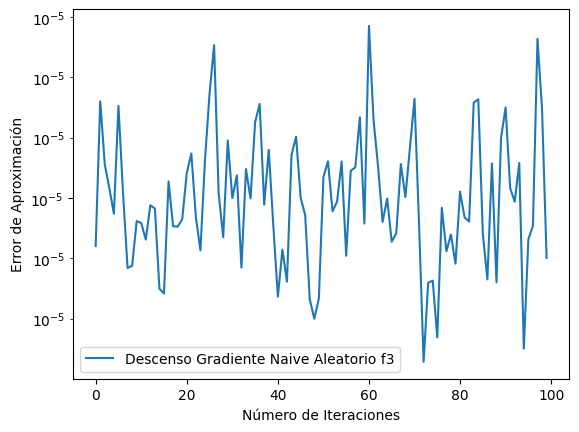

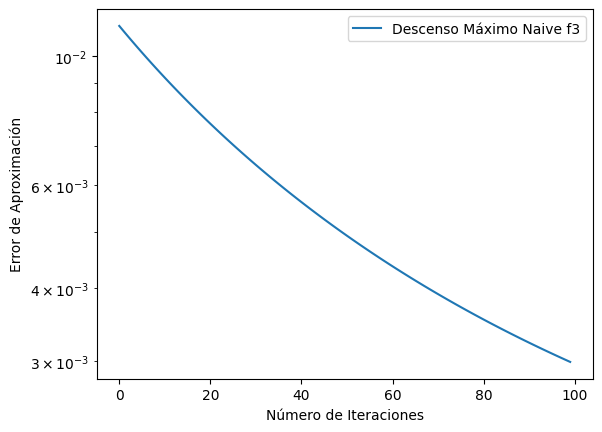

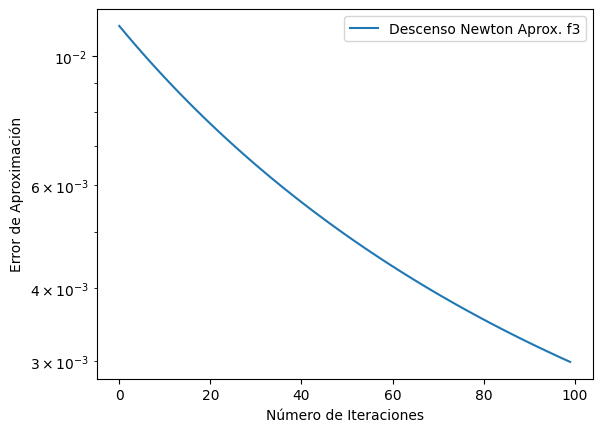

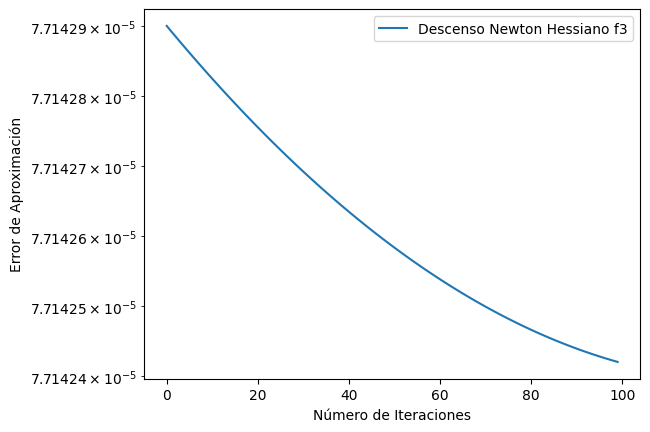

In [21]:
# Parámetros ajustados
x0 = np.array([-1.2, 1, 1, 1, 1, 1, 1, 1, -1.2, 1])
alpha = 0.00001  # Tamaño de paso reducido
maxIter = 100  # Número máximo de iteraciones
tol = 1e-6  # Tolerancia

# Ejecutar los algoritmos con el nuevo valor de alpha
f3_gradiente = descenso_gradiente_naive_aleatorio(f_rosenbrock_10d, df_rosenbrock_10d, x0, alpha, maxIter, tol)
f3_maximo = descenso_maximo_naive(f_rosenbrock_10d, df_rosenbrock_10d, x0, alpha, maxIter, tol)
f3_aprox = descenso_newton_aprox(f_rosenbrock_10d, df_rosenbrock_10d, ddf_rosenbrock_10d, x0, alpha, maxIter, tol)
f3_hessiano = descenso_newton_hessiano(f_rosenbrock_10d, df_rosenbrock_10d, ddf_rosenbrock_10d, x0, alpha, maxIter, tol)
imprimir_tabla(f3_gradiente, "Descenso Gradiente Naive Aleatorio f3")
imprimir_tabla(f3_maximo, "Descenso Máximo Naive f3")
imprimir_tabla(f3_aprox, "Descenso Newton Aprox. f3")
imprimir_tabla(f3_hessiano, "Descenso Newton Hessiano f3")

# Graficar errores
graficar_errores(f3_gradiente, "Descenso Gradiente Naive Aleatorio f3")
plt.show()
graficar_errores(f3_maximo, "Descenso Máximo Naive f3")
plt.show()
graficar_errores(f3_aprox, "Descenso Newton Aprox. f3")
plt.show()
graficar_errores(f3_hessiano, "Descenso Newton Hessiano f3")
plt.show()